# Project Proposal and Initial Analyses

So, what ingredients are needed to craft the perfect concoction for a movie's success? Our team embarked on this cinematic experiment by defining the core questions that drive our analysis and consulting with our head scientist (TA, of course!) during Friday meetups for guidance. With a green light on our five key ingredients, we're set to uncover the data-driven formula behind a successful movie, starting with our main ingredient: the CMU Movies dataset.

In [1]:
# Let's first import all the necessary librairies 

# For data manipulation
import pandas as pd
import numpy as np

# For API Calls
import requests

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning for bar graph hues
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Overview of CMU Movies Dataset 

Note: As mentioned on ED and confirmed with our head scientist, Dr. Sepideh, we opted not to upload the full CMU dataset to GitHub. Instead, one team member loaded it locally and created a pickle file, cmu_movies_df.pkl, which can be found in the pickles folder. This file was created in pipelines/movies_cleaning.ipynb. 

In that pipeline, we preprocess the CMU dataset by separating Freebase IDs from their corresponding values, allowing for easier analysis of categorical variables such as languages, countries, and genres. Specifically, we split these columns so that each Freebase ID has a corresponding human-readable name in a separate column. Here’s an example of how we apply this split function:

```python
# Applying the split function to Languages, Countries, and Genres columns
df[['Language Freebase ID', 'Language Name']] = df['Languages'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Country Freebase ID', 'Country Name']] = df['Countries'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Genre Freebase ID', 'Genre Name']] = df['Genres'].apply(lambda x: pd.Series(split_freebase_data(x)))
```

This step ensures that we can work with a clearer, more structured dataset, which improves the interpretability of our results.

Let’s load that pickle below:

In [2]:
# Loading our CMU movies pickle 
df_cmu_movies = pd.read_pickle("pickles/cmu_imdb_tmdb_merged.pkl")

# Displaying the first few rows
df_cmu_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


In [3]:
# Let us see the data frames dimension
df_size = df_cmu_movies.shape
print(f"Number of row entries: {df_size[0]} \nNumber of columns: {df_size[1]}")


Number of row entries: 81855 
Number of columns: 24


In [7]:
df_cmu_movies.columns

Index(['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie Name', 'Release Date',
       'Box Office Revenue', 'Runtime', 'Language Freebase ID',
       'Language Name', 'Country Freebase ID', 'Country Name',
       'Genre Freebase ID', 'Genre Name', 'IMDb_ID', 'vote_average',
       'vote_count', 'revenue', 'budget', 'popularity', 'production_companies',
       'director', 'writers', 'producers', 'imdb_rating', 'imdb_votes'],
      dtype='object')

We have a lot of columns! Since we are not going to be using the freebase API, let us remove it from our dataframe.

In [8]:
freebase_columns = [
    'Wikipedia Movie ID', 'Freebase Movie ID', 'Language Freebase ID', 
    'Country Freebase ID', 'Genre Freebase ID'
]
df_cmu_movies = df_cmu_movies.drop(columns=freebase_columns)
df_cmu_movies.columns

Index(['Movie Name', 'Release Date', 'Box Office Revenue', 'Runtime',
       'Language Name', 'Country Name', 'Genre Name', 'IMDb_ID',
       'vote_average', 'vote_count', 'revenue', 'budget', 'popularity',
       'production_companies', 'director', 'writers', 'producers',
       'imdb_rating', 'imdb_votes'],
      dtype='object')

In [9]:
df_cmu_movies.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,vote_average,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,5.1,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,7.0,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,5.8,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,5.3,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


#### Duplicates 

Now, let us check for duplicates.

In [10]:
# Checking for duplicates in df_cmu_movies
print(f"Duplicates in df_cmu_movies: {df_cmu_movies['Movie Name'].duplicated().sum()}")

Duplicates in df_cmu_movies: 6377


We initially planned to drop movies with the same name, but we realized that having the same title doesn't necessarily mean it's the same movie. Variations in factors such as production country, release year, and different versions can result in multiple entries with the same title, which makes it important to retain these records rather than remove them.

In [11]:
# Creating a data set with cmu movie duplicates to take a closer look at them
df_cmu_duplicates = df_cmu_movies[df_cmu_movies.duplicated(subset=['Movie Name'], keep=False)]

# Sorting them by Movie Name alphabetically
df_cmu_duplicates = df_cmu_duplicates.sort_values(by='Movie Name')

df_cmu_duplicates.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,vote_average,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
77399,100 Days,1991,NaN,161.0,[Hindi Language],[India],"[Horror, Suspense, World cinema]",tt0101244,5.500,8.0,0.0,0.0,1.739,Jayvijay Enterprises,Partho Ghosh,"Devjyoti Roy, Bhushan Banmali",Jay Mehta,6.3,1188.0
19013,100 Days,2001-02-01,NaN,100.0,[English Language],[United Kingdom],[Drama],tt0315100,4.000,2.0,0.0,0.0,2.121,NaN,Nick Hughes,Nick Hughes,NaN,7.6,85.0
12216,100% Love,2011-04,NaN,140.0,[Telugu language],[],[Romantic comedy],tt1869226,6.100,29.0,0.0,1500000.0,5.203,Geetha Arts,Sukumar,"Hari Prasad, Sukumar, Thota Srinivas","Edida Raja, Bunny Vas, Allu Aravind",7.0,3240.0
69286,100% Love,2012-01-20,NaN,NaN,[Bengali Language],[India],"[Romance Film, Comedy film]",tt2579680,5.600,5.0,0.0,0.0,2.082,SVF Entertainment,Ravi Kinagi,Selvaraghavan,"Jeet, Shrikant Mohta, Mahendra Soni",6.0,886.0
17910,12,2003-06-27,NaN,124.0,[English Language],[United States of America],"[Comedy film, Musical, Indie]",tt0192947,6.421,19.0,0.0,0.0,1.658,NaN,Lawrence Bridges,Lawrence Bridges,NaN,7.7,55.0


In [12]:
# df_cmu_movies = df_cmu_movies.drop_duplicates(subset=['Movie Name'])

#### Null Values

From the data frame head, we see several NaN values. It’s important to understand how many NaNs are present across the entire dataset. We can visualize this with a bar graph, like this:

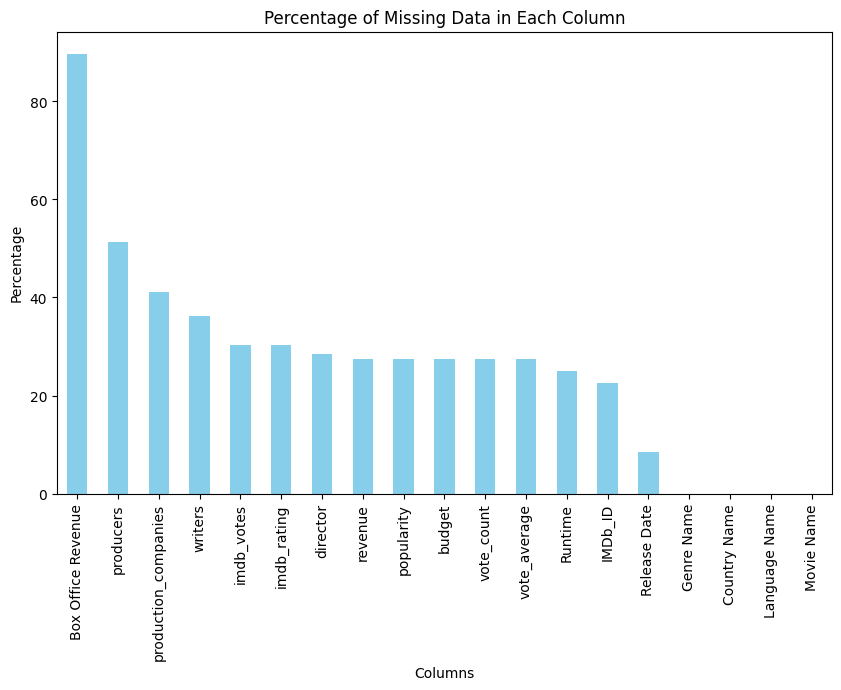

In [13]:
# Calculating the percentage of missing data in each column
missing_data = df_cmu_movies.isnull().mean() * 100

# Sorting columns by missing percentage
missing_data_sorted = missing_data.sort_values(ascending=False)

# Plotting 
plt.figure(figsize=(10,6))
missing_data_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Our dataset has a significant amount of missing values in the box office revenue column, which makes it difficult to apply common techniques like removing rows with null values or replacing them with the mean, as this would lead to substantial data loss.

However, it's important to note that box office revenue is just one component of total revenue, and we have much less missing data in the revenue column. Therefore, when working with the box office data, we can closely consider its relationship to total revenue and use that for further insights.

For other columns with missing data, such as producers, production company, writers, and director, we won't focus on them as much in our analysis. You'll find more details in the analyses below.

## Analysis Proposal 

Now that we have a comprehensive understanding of our data, let's dive into our  'chemical ingredients' that contribute to a movie's success, which have been aproved by our head TA.

#### Actor's Success

When people think about a movie's success, the first thing that often comes to mind is the actors. A well-known actor can elevate a movie, making it more popular, drawing larger audiences, and ultimately contributing to its commercial success. Conversely, an unknown actor may not have the same impact. In this section, we aim to explore whether there is a relationship between an actor's success and the average movie ratings they appear in.

To conduct this analysis, we will leverage several datasets: the Oscar dataset, IMDb dataset, the CMU Movie dataset, and Rotten Tomatoes dataset.

Before diving into the analysis, we must first define what constitutes a "successful actor." For many in the industry, winning an Oscar is the pinnacle of achievement. While an actor's success can be measured in many ways, for the purposes of this milestone, we will define a successful actor as one who has won the highest number of Oscars.

To begin, let us load the pickles of the mentioned data sets:

In [229]:
oscar = pd.read_pickle('pickles/oskar_df.pkl')
imdb = pd.read_pickle('pickles/imdb_data.pkl')
rotten = pd.read_pickle('pickles/rotten_tomatoes.pkl')

##### Oscar Dataser

We will start off with the Oscar data. Let us first check if we have any null values:

In [230]:
null_counts = oscar.isnull().sum()
print(null_counts)

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64


Let us also see the dimensions:

In [231]:
df_size = oscar.shape
print(f"Dimensions of the Oscar DataFrame: {df_size}")

Dimensions of the Oscar DataFrame: (10889, 7)


Let us take a peak at the Oscar data:

In [232]:
oscar.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True
10888,2023,2024,96,HONORARY AWARD,"To Carol Littleton, whose commitment to her cr...",NaN,True


The Oscars are awarded not only to actors and actresses, but also to individuals in various other categories. Therefore, we will filter out anyone who does not fall into the actor or actress category for the purposes of our analysis.

In [233]:
oscar = oscar[oscar['category'].str.contains('ACTOR') | oscar['category'].str.contains('ACTRESS')]

In [234]:
# We used tail instead of head because head didn't visually highlight the impact of the previous line of code,
# while tail provided a clearer view of the results.
oscar.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10780,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Emily Blunt,Oppenheimer,False
10781,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Danielle Brooks,The Color Purple,False
10782,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,America Ferrera,Barbie,False
10783,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Jodie Foster,Nyad,False
10784,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Da'Vine Joy Randolph,The Holdovers,True


Wow! Quite lucky of us compared to the CMU movies data haha.

We also notice that Best Actor and Best Actress aren’t the only possible Oscar wins; actors can also receive recognition in Supporting Actor and Supporting Actress categories. Additionally, Oscar nominations play a significant role, as even a nomination can enhance an actor’s reputation and attract audiences.

However, lead roles generally have a larger impact on a movie’s success, as these actors often drive the story and have more screen time.  For this reason, we are going to build an Oscar score that applies weights to different award categories, giving greater significance to lead roles and including nominations to reflect their influence. We have decided to apply the following weights:

- Lead Actor Oscar Win (LAO) has weight 4. 

- Supporting Actor Oscar Win (SAO) has weight 3.

- Lead Actor Oscar Nomination (LAN) has weight 2. 

- Supporting Actor Oscar (SAN) Nomination has weight 1.

Oscar Score= [# of LAO]*5 + [# of SAO]*3 +  [# of LAN]*2+ [# of SAN]×1

Let us add an Oscar Score column to the Oscar dataset:

First, let us transform the Winner column into integers:

In [235]:
# Converting boolean 'winner' column to 1 and 0
oscar['winner'] = oscar['winner'].astype(int)
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0


Now let us calculate the oscar score:

In [236]:
def calculate_oscar_score(row):
    # Weights for each type of win or nomination
    lao = 5  
    sao = 3  
    lan = 2  
    san = 1  

    oscar_score = 0

    # Lead role win: No "supporting" in category and winner = 1
    if 'SUPPORTING' not in row['category'].upper() and row['winner'] == 1:
        oscar_score += lao

    # Supporting role win: "supporting" in category and winner = 1
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 1:
        oscar_score += sao

    # Lead role nomination: No "supporting" in category and winner = 0
    elif 'SUPPORTING' not in row['category'].upper() and row['winner'] == 0:
        oscar_score += lan

    # Supporting role nomination: "supporting" in category and winner = 0
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 0:
        oscar_score += san

    return oscar_score

oscar['oscar_score'] = oscar.apply(calculate_oscar_score, axis=1)


In [237]:
oscar.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,oscar_score
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0,2
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1,5
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0,2
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1,5
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0,2


Let us remove the columns that are unnecessary for our section anlaysis.

In [238]:
oscar = oscar.drop(['year_ceremony', 'ceremony','year_film','ceremony','category','film','winner'], axis=1)
oscar = oscar.rename(columns={'name': 'actor_name'})
oscar.head()

,actor_name,oscar_score
0,Richard Barthelmess,2
1,Emil Jannings,5
2,Louise Dresser,2
3,Janet Gaynor,5
4,Gloria Swanson,2


Now, let us group these scores by Actor:

In [241]:
oscar = oscar.groupby('actor_name')['oscar_score'].sum().reset_index()

# Renaming the summed column to 'oscar_score'
oscar.rename(columns={'oscar_score': 'total_oscar_score'}, inplace=True)

oscar.head()

,actor_name,total_oscar_score
0,Abigail Breslin,1
1,Adam Driver,3
2,Adolph Caesar,1
3,Adolphe Menjou,2
4,Adriana Barraza,1


Let us see what are the top 10 actors according to the Oscar Score:

In [244]:
oscar.sort_values(by='total_oscar_score', ascending=False, inplace=True)
oscar.head(10)

,actor_name,total_oscar_score
673,Meryl Streep,46
524,Katharine Hepburn,36
92,Bette Davis,28
392,Jack Nicholson,28
881,Spencer Tracy,24
216,Denzel Washington,21
382,Ingrid Bergman,21
639,Marlon Brando,21
742,Paul Newman,20
560,Laurence Olivier,20


##### IMDB Data set 